<a href="https://colab.research.google.com/github/SWAGATHCHOWDARY/COVID-19-EDA/blob/main/EDA_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#input : from covid_19_data csv file Observation date, country/region, confirmed, deaths, recovered columns were taken for visualization
import pandas as pd 
import plotly.express as px

cases=pd.read_csv(r"/content/drive/My Drive/covid 19 visualization files/covid_19_data.csv")
data=cases.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered"].max()
data=data.reset_index()
data["Date"]=pd.to_datetime(data["ObservationDate"])
data["Date"]=data["Date"].dt.strftime("%d/%m/%Y")
data["Active"]=data["Confirmed"]-data["Recovered"]-data["Deaths"]
data["Country"]=data["Country/Region"]

fig=px.choropleth(data,locations="Country",locationmode="country names",color="Confirmed",hover_name="Country/Region",
hover_data=[data.Active,data.Deaths,data.Recovered],projection="mercator",animation_frame="Date",width=1000, height=900,
color_continuous_scale="Inferno",range_color=[1000,50000],title="Observation : Number of confirmed cases all over the world")

fig.update(layout_coloraxis_showscale=True)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Analysis : from the above visualization we can analyse the active, deaths & recovered cases all over the world w.r.t country wise

In [20]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 303kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
#input : from patients_data csv file detected state, detected district and patient number columns were taken for visualization of treemap
patients=pd.read_csv(r"/content/drive/My Drive/covid 19 visualization files/patients_data.csv")
data=patients.groupby(["detected_state","detected_district"])["patient_number"].count().reset_index()
fig=px.treemap(data,path=["detected_state", "detected_district"],values="patient_number",
               height=1500,
               title="Observation : Number of Confirmed Cases in India w.r.t state and district wise",
               color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

Analysis : from the above visualization we can analyse number of cases reported throughout the INDIA w.r.t state and district respectively

In [3]:
#input : from AgeGroupDetails csv file total cases and age group columns were taken to visualize this pie chart 
data=pd.read_csv(r"/content/drive/My Drive/covid 19 visualization files/AgeGroupDetails.csv")
fig=px.pie(data,values="TotalCases",names="AgeGroup",title="Observation : Confirmed cases in India by age groups")
fig.show()

Analysis : from the above pie chart we can see that the percentage of each age group that are infected by COVID - 19 in INDIA

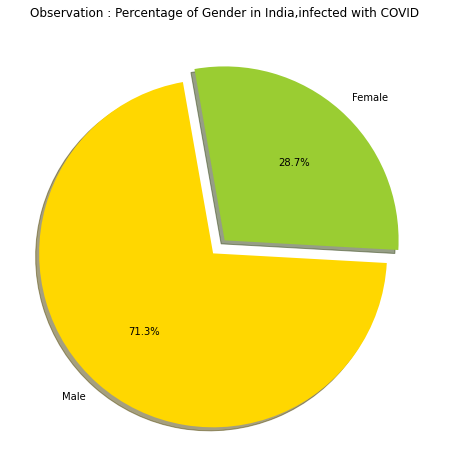

In [4]:
#input : from Induvidual details csv file gender column is divided into two sub lists male and female.
from matplotlib import pyplot as plt
data=pd.read_csv(r"/content/drive/My Drive/covid 19 visualization files/IndividualDetails.csv")
labels=["Male","Female"]
sizes=[]
sizes.append(list(data["gender"].value_counts())[0])
sizes.append(list(data["gender"].value_counts())[1])
explode=(0.1,0)
colors=["gold","yellowgreen"]
plt.figure(figsize=(10,8))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=100)
plt.title("Observation : Percentage of Gender in India,infected with COVID")
plt.show()

Analysis : from the above pie chart we can analyse the percentage of gender that are infected with COVID - 19 virus

In [5]:
#input : from the covid 19 india csv file state/union territory, confirmed, deaths and cured columns were taken.
from IPython.display import display , Markdown
display(Markdown("Observation : STATE WISE CONFIRMED,DEATHS,CURES w.r.t. to Recovery and Death rates of COVID in India"))
india_covid_19=pd.read_csv(r"/content/drive/My Drive/covid 19 visualization files/covid_19_india.csv")
state_details=pd.pivot_table(india_covid_19,values=["Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc="max")
state_details["Recovery Rate"]=round(state_details["Cured"]/state_details["Confirmed"],2)
state_details["Death Rate"]=round(state_details["Deaths"]/state_details["Confirmed"],2)
state_details=state_details.sort_values(by="Confirmed",ascending=False)
state_details.style.background_gradient(cmap="jet")

Observation : STATE WISE CONFIRMED,DEATHS,CURES w.r.t. to Recovery and Death rates of COVID in India

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,2687,259,178,0.100000,0.070000
Delhi,1561,30,30,0.020000,0.020000
Tamil Nadu,1204,81,12,0.070000,0.010000
Rajasthan,1005,147,3,0.150000,0.000000
Madhya Pradesh,987,64,53,0.060000,0.050000
Uttar Pradesh,735,51,11,0.070000,0.010000
Gujarat,695,59,30,0.080000,0.040000
Telengana,647,120,18,0.190000,0.030000
Andhra Pradesh,503,16,9,0.030000,0.020000


Analysis: from the above pivot table we can clearly analyse each and every state in INDIA with active,deaths,cured cases with repect to death rate and recovery rate as well.

In [6]:
#input : from patients data csv file infection reason as main criteria. 
from IPython.display import display , Markdown
display(Markdown("Top 20 travelling list of the citizens of India,which caused COVID infections"))
patients=pd.read_csv(r"/content/drive/My Drive/covid 19 visualization files/patients_data.csv")
data=patients[~patients["infection reason"].str.contains("Travelled from").isna()]
data=data[data["infection reason"].str.contains("Travelled from")]
data["infection reason"]=data["infection reason"].str.replace("Travelled from",'')
data=data.groupby("infection reason")["infection reason"].count().sort_values(ascending=False)
data=pd.DataFrame(data)
data=data.rename(columns={"infection reason": "total count"})
data.head(20)

Top 20 travelling list of the citizens of India,which caused COVID infections

,total count
infection reason,
Dubai,98
UK,26
"Dubai, UAE",25
Delhi,20
Italy,18
Middle East,13
Saudi Arabia,12
London,11
Delhi and Contact history with TN-P5 and TN-P6,10


Analysis : from the above data table we can see the different travelling lists of the INDIAN citizens who are infected with COVID 19 virus due to travelling

In [7]:
#input : this data has been taken from the internet.
symptoms={"symptom":["Fever",
                     "Dry cough",
                     "Fatigue",
                     "Sputum production",
                     "Shortness of breath",
                     "Muscle pain",
                     "Sore throat",
                     "Headache",
                     "Chills",
                     "Nausea or vomiting",
                     "Nasal congestion",
                     "Diarrhoea",
                     "Haemoptysis",
                     "Conjunctival congestion"],
                     "percentage":[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
fig=px.pie(symptoms,values="percentage",names="symptom",title="Observation : Major symptoms caused by COVID")
fig.show()

Analysis : from the above pie chart we can analyse the maximum number of symptoms caused by COVID 19 virus by percentage of the symptoms as well

In [8]:
#input : from the state wise testing details csv file state and total samples columns were taken.
data=pd.read_csv(r"/content/drive/My Drive/covid 19 visualization files/StatewiseTestingDetails.csv")
testing=data.groupby("State")["TotalSamples"].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation="h",
             height=600,
             title="Observation : Statewise Total Testing Samples Collected till 11th april,2020",
             color="State")
fig.show()

Analysis : from the above bar plot we can see clearly total testing samples for COVID - 19 were taken so far and we can also see highest number and lowest number of samples taken state wise in INDIA

In [9]:
#input : This input has been taken form ourworldindata.org
from IPython.display import display, HTML
display(HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/3848896" data-url="https://flo.uri.sh/visualisation/3848896/embed" aria-label=""><script src="https://public.flourish.studio/resources/embed.js"></script></div>'''))


Analysis : by the following racing bar graph we can clearly visualize the highest cases that were reported globally due to COVID - 19 from the date : JANUARY 22 - AUGUST 16